<a href="https://colab.research.google.com/github/kimalaacer/PyTorch-for-Deep-Learning-and-Computer-Vision/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [0]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))
                                ])
training_dataset = datasets.MNIST(root = './data', train= True, download = True, transform = transform )

training_dataset

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle = True)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  print(image.shape)
  image = image*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


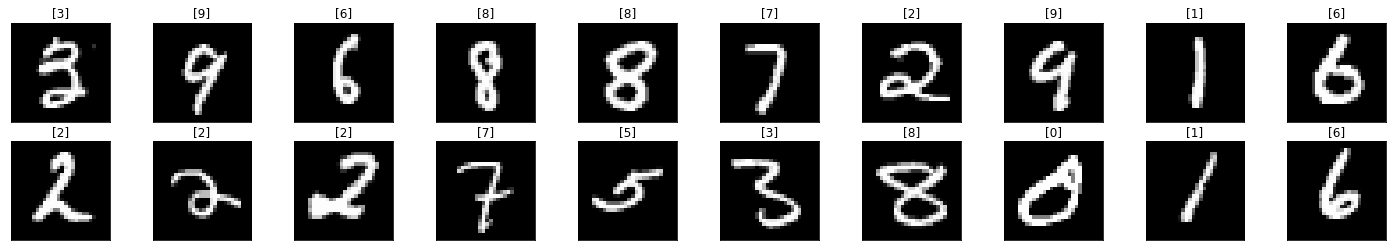

In [4]:
dataiter = iter(training_loader)
images, labels=dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])



In [0]:
class Classifier(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [6]:
model = Classifier(784, 125, 65, 10)
model 

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [21]:
epochs = 15
running_loss_history = []
running_corrects_history = []
for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
    else:
        epoch_loss = running_loss/len(training_loader)
        epoch_acc = running_corrects.float()/len(training_loader)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(epoch_acc)
        print("Training loss: {:.4f}, Acc: {:.4f}".format(epoch_loss, epoch_acc.item()))
    


Training loss: 0.0614, Acc: 98.1667
Training loss: 0.0609, Acc: 98.1733
Training loss: 0.0605, Acc: 98.1617
Training loss: 0.0601, Acc: 98.1783
Training loss: 0.0599, Acc: 98.1850
Training loss: 0.0595, Acc: 98.2083
Training loss: 0.0594, Acc: 98.2050
Training loss: 0.0589, Acc: 98.2367
Training loss: 0.0587, Acc: 98.2083
Training loss: 0.0584, Acc: 98.2433
Training loss: 0.0581, Acc: 98.2383
Training loss: 0.0579, Acc: 98.2517
Training loss: 0.0575, Acc: 98.2383
Training loss: 0.0572, Acc: 98.2683
Training loss: 0.0570, Acc: 98.2567


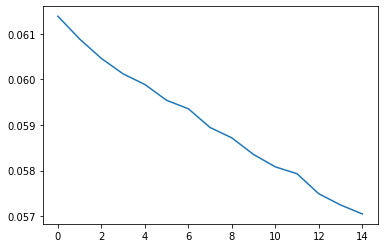

In [39]:
plt.plot(running_loss_history, label = "Training loss")

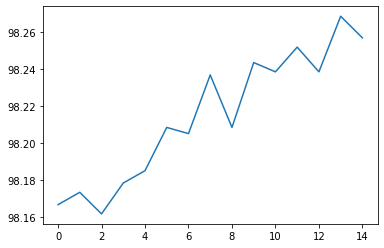

In [33]:
plt.plot(running_corrects_history, label = "Acc")
